# HOUSE PRICE PROJECT

## 1. About the Dataset
This is a real dataset of house prices sold in Seattle, Washing, USA between August and December 2022. 
<br> The task is to predict the house price in this area based on several features, which are described below.

<br> **Feature Description:**
- beds: Number of bedrooms in property
- baths: Number of bathrooms in property. Note 0.5 corresponds to a half-bath which has a sink and toilet but no tub or shower
- size: Total floor area of property
- size_units: Units of the previous measurement
- lot_size: Total area of the land where the property is located on. The lot belongs to the house owner
- lot_size_units: Units of the previous measurement
- zip_code: Zip code. This is a postal code used in the USA
- price: Price the property was sold for (US dollars)

## 2. Loading the data 

In [3]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Import dataset
train = pd.read_csv('C:/Users/XPS 13 9365/OneDrive/Desktop/HousePrice/data/train.csv')
test = pd.read_csv('C:/Users/XPS 13 9365/OneDrive/Desktop/HousePrice/data/test.csv')

In [5]:
train.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0


array([[<Axes: title={'center': 'beds'}>,
        <Axes: title={'center': 'baths'}>],
       [<Axes: title={'center': 'size'}>,
        <Axes: title={'center': 'lot_size'}>],
       [<Axes: title={'center': 'zip_code'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

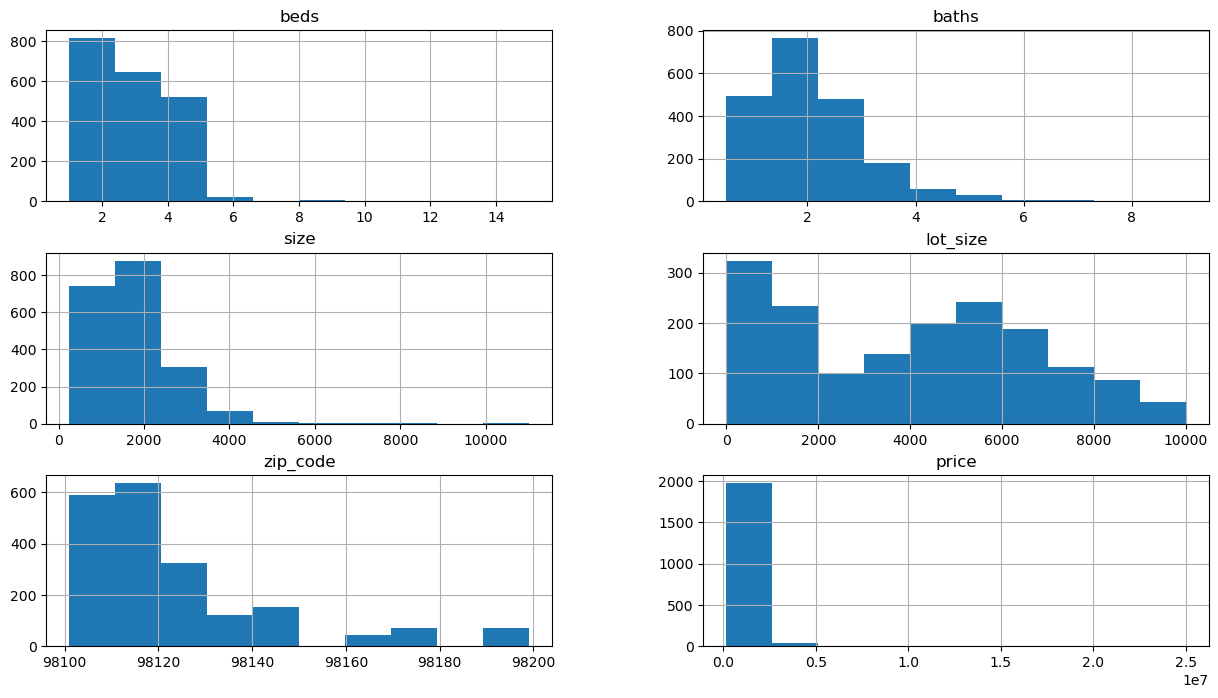

In [6]:
train.hist(figsize=(15,8))

In [7]:
train.columns

Index(['beds', 'baths', 'size', 'size_units', 'lot_size', 'lot_size_units',
       'zip_code', 'price'],
      dtype='object')

In [9]:
train.drop(train.columns[[3, 5, 6]], axis=1, inplace=True)

In [10]:
test.columns

Index(['beds', 'baths', 'size', 'size_units', 'lot_size', 'lot_size_units',
       'zip_code', 'price'],
      dtype='object')

In [11]:
test.drop(test.columns[[3,5,6]], axis=1, inplace=True)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   beds      2016 non-null   int64  
 1   baths     2016 non-null   float64
 2   size      2016 non-null   float64
 3   lot_size  1669 non-null   float64
 4   price     2016 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 78.9 KB


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   beds      505 non-null    int64  
 1   baths     505 non-null    float64
 2   size      505 non-null    float64
 3   lot_size  428 non-null    float64
 4   price     505 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 19.9 KB


## 3. Data Imputation

In [14]:
from sklearn.impute import KNNImputer

In [15]:
#train_set
for i in range(len(train.columns)):
    missing_train_data = train[train.columns[i]].isna().sum()
    perc = missing_train_data/len(train) * 100
    print(f"Column {i} has {perc}% missing values")

Column 0 has 0.0% missing values
Column 1 has 0.0% missing values
Column 2 has 0.0% missing values
Column 3 has 17.21230158730159% missing values
Column 4 has 0.0% missing values


In [16]:
#impute data for train set
from sklearn.impute import SimpleImputer
imputer = KNNImputer(missing_values=np.nan, n_neighbors=2)
imputer.fit(train.iloc[:,3:4])
train.iloc[:,3:4] = imputer.transform(train.iloc[:,3:4])

In [17]:
#test_set
for m in range(len(test.columns)):
    missing_test_data = test[test.columns[m]].isna().sum()
    percentage = missing_test_data/len(test) * 100
    print(f"Column {m} has {percentage}% missing values")

Column 0 has 0.0% missing values
Column 1 has 0.0% missing values
Column 2 has 0.0% missing values
Column 3 has 15.247524752475247% missing values
Column 4 has 0.0% missing values


In [18]:
#impute data for test set
imputer.fit(test.iloc[:,3:4])
test.iloc[:,3:4] = imputer.transform(test.iloc[:,3:4])

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   beds      2016 non-null   int64  
 1   baths     2016 non-null   float64
 2   size      2016 non-null   float64
 3   lot_size  2016 non-null   float64
 4   price     2016 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 78.9 KB


In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   beds      505 non-null    int64  
 1   baths     505 non-null    float64
 2   size      505 non-null    float64
 3   lot_size  505 non-null    float64
 4   price     505 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 19.9 KB


In [21]:
X_train = train.drop(['price'],axis=1)
y_train = train['price']

In [22]:
X_test = test.drop(['price'],axis=1)
y_test = test['price']

In [23]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_normalized = sc.fit_transform(X_train.iloc[:,0:4])
X_test_normalized = sc.transform(X_test.iloc[:,0:4])

In [24]:
X_train_normalized.shape

(2016, 4)

In [25]:
X_train_normalized

array([[ 1.13454946e-01,  3.39427577e-01,  9.28639396e-01,
         8.60671262e-01],
       [ 9.10406759e-01, -1.59686934e-01,  5.48165058e-01,
        -1.56483628e+00],
       [ 9.10406759e-01,  8.38542087e-01,  3.30751151e-01,
        -3.56000815e-02],
       ...,
       [ 9.10406759e-01, -1.59686934e-01,  4.39458105e-01,
         9.61739298e-01],
       [-6.83496868e-01, -1.59686934e-01, -1.02265042e+00,
         3.67683373e-16],
       [ 1.13454946e-01, -1.59686934e-01, -2.79817953e-02,
         1.60067636e-01]])

## 4. Split the dataset
Here I will split the train set into 80% train and 20% validation.

In [26]:
from sklearn.model_selection import train_test_split

X_train_1, X_valid, y_train_1, y_valid = train_test_split(X_train_normalized,y_train,train_size = 0.8, test_size = 0.2, random_state=0)

In [27]:
X_train_1.shape

(1612, 4)

In [28]:
X_train.shape

(2016, 4)

In [29]:
X_valid

array([[-6.83496868e-01,  8.38542087e-01, -5.54123451e-01,
         3.67683373e-16],
       [-1.48044868e+00, -1.15791596e+00, -1.21941001e+00,
        -1.56481202e+00],
       [ 9.10406759e-01,  1.33765660e+00,  1.57001042e+00,
        -2.00543116e-01],
       ...,
       [-6.83496868e-01, -6.58801445e-01, -2.01912921e-01,
         1.32720132e+00],
       [ 9.10406759e-01,  3.39427577e-01,  1.24207940e-01,
        -4.10360359e-01],
       [ 1.13454946e-01, -1.59686934e-01,  8.09061747e-01,
         7.91540725e-01]])

## 5. Train Maching Learning Model

In [30]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

In [31]:
dtr.fit(X_train_1, y_train_1)

DecisionTreeRegressor()

In [32]:
y_train_pred = dtr.predict(X_train_1)

In [33]:
from sklearn.metrics import mean_absolute_error as mae

In [34]:
y_train_1 = np.array(y_train_1)
y_train_1

array([820000., 525000., 315000., ..., 550000., 599950., 325000.])

In [35]:
y_train_pred

array([820000., 525000., 315000., ..., 550000., 599950., 325000.])

In [36]:
train_mae= mae(y_train_1,y_train_pred)
train_mae

2947.446856906535

In [37]:
train_MAE = []
for i in range(len(y_train_1)):
    sum = abs(y_train_1[i] - y_train_pred[i])
    train_MAE.append(sum)

{'whiskers': [<matplotlib.lines.Line2D at 0x1b915cccf90>,
 'caps': [<matplotlib.lines.Line2D at 0x1b915d4c590>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b915676b10>],
 'medians': [<matplotlib.lines.Line2D at 0x1b915d4dbd0>],
 'fliers': [],
 'means': []}

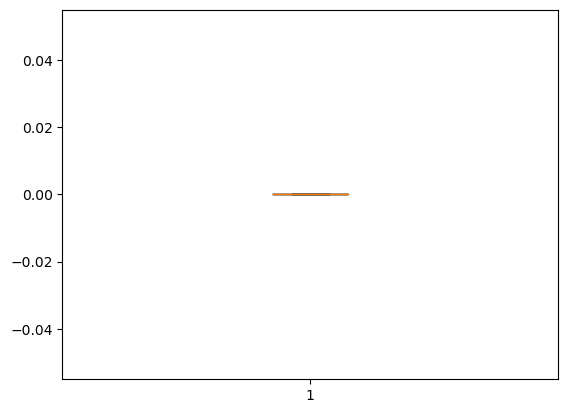

In [38]:
plt.boxplot(train_MAE,showfliers=False)

In [39]:
MAE = []
for i in train_MAE:
    if i > 0.0:
        MAE.append(i)

{'whiskers': [<matplotlib.lines.Line2D at 0x1b916309d90>,
 'caps': [<matplotlib.lines.Line2D at 0x1b91630b410>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b915d6a410>],
 'medians': [<matplotlib.lines.Line2D at 0x1b916314910>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b9152fd2d0>],
 'means': []}

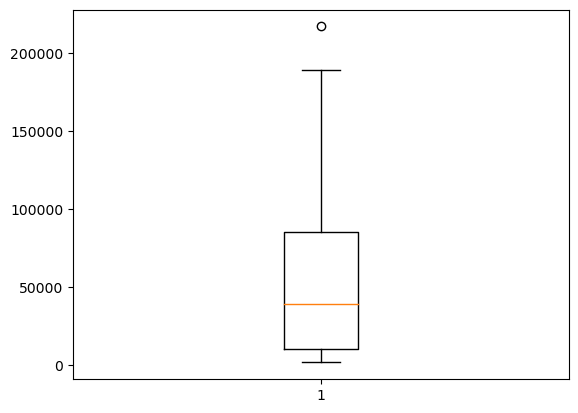

In [40]:
plt.boxplot(MAE)

In [41]:
y_val_pred = dtr.predict(X_valid)

In [43]:
y_valid = np.array(y_valid)

In [45]:
val_mae= mae(y_valid,y_val_pred)
val_mae

283641.9016089109

In [46]:
val_MAE = []
for i in range(len(y_valid)):
    sum = abs(y_valid[i] - y_val_pred[i])
    val_MAE.append(sum)

{'whiskers': [<matplotlib.lines.Line2D at 0x1b9163882d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b916389fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b916383b50>],
 'medians': [<matplotlib.lines.Line2D at 0x1b91638bad0>],
 'fliers': [],
 'means': []}

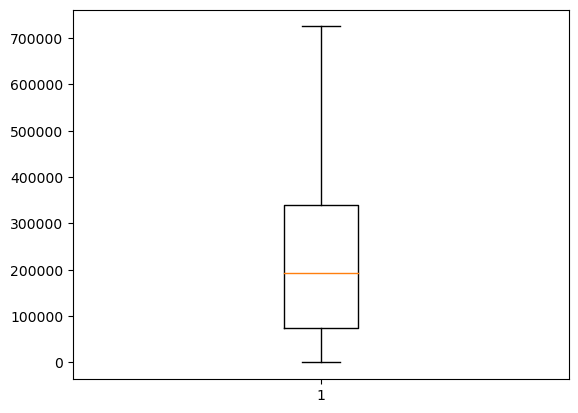

In [47]:
plt.boxplot(val_MAE,showfliers=False)

In [48]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    "criterion": ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    "splitter": ['best', 'random'],
    "max_depth": [5,10,30,50,100],
    "min_samples_split": [2,4,6,8,10],
    "max_features": [2,3,4,10],
    "ccp_alpha": [0,0.1,0.4,0.5,1]
}

grid_search = GridSearchCV(dtr, param_grid, cv=5, scoring = "neg_mean_absolute_error",return_train_score=True)
grid_search.fit(X_train_1, y_train_1)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'ccp_alpha': [0, 0.1, 0.4, 0.5, 1],
                         'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [5, 10, 30, 50, 100],
                         'max_features': [2, 3, 4, 10],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'splitter': ['best', 'random']},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [49]:
best_dtr= grid_search.best_estimator_
best_dtr

DecisionTreeRegressor(ccp_alpha=0.4, criterion='absolute_error', max_depth=10,
                      max_features=10, min_samples_split=4, splitter='random')

In [50]:
best_dtr.fit(X_train_1, y_train_1)

DecisionTreeRegressor(ccp_alpha=0.4, criterion='absolute_error', max_depth=10,
                      max_features=10, min_samples_split=4, splitter='random')

In [51]:
y_val_pred_1 = best_dtr.predict(X_valid)

In [52]:
mae(best_dtr.predict(X_valid), y_valid)

248013.33910891088

In [95]:
from sklearn.metrics import r2_score
score = r2_score(y_valid, y_val_pred_1)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 51.0%


In [53]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train_1, y_train_1)

RandomForestRegressor()

In [54]:
rfr.score(X_train_1, y_train_1)

0.8614281112523048

In [55]:
y_train_pred_rfr = rfr.predict(X_train_1)

In [56]:
mae(y_train_1, y_train_pred_rfr)

101667.20115779473

In [57]:
y_val_pred_rfr = rfr.predict(X_valid)

In [58]:
mae(y_valid, y_val_pred_rfr)

244950.60765306262

In [59]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    "n_estimators": [30,50,100],
    "max_depth":[5,10,50],
    "max_features": [2,3,4,5],
    "ccp_alpha": [0,0.1,0.5,1]
}

grid_search = GridSearchCV(rfr, param_grid, cv=5, scoring = "neg_mean_absolute_error",return_train_score=True)
grid_search.fit(X_train_1, y_train_1)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'ccp_alpha': [0, 0.1, 0.5, 1],
                         'max_depth': [5, 10, 50], 'max_features': [2, 3, 4, 5],
                         'n_estimators': [30, 50, 100]},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [60]:
best_rfr= grid_search.best_estimator_

In [61]:
best_rfr

RandomForestRegressor(ccp_alpha=0, max_depth=10, max_features=2,
                      n_estimators=50)

In [62]:
best_rfr.fit(X_valid, y_valid)

RandomForestRegressor(ccp_alpha=0, max_depth=10, max_features=2,
                      n_estimators=50)

In [63]:
mae(best_rfr.predict(X_valid), y_valid)

105928.41412794734

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

In [66]:
lin = LinearRegression()
svr = SVR()
sgd = SGDRegressor()
gpr = GaussianProcessRegressor()
knr = KNeighborsRegressor()
gbr = GradientBoostingRegressor()
mlp = MLPRegressor()
las = Lasso()

In [442]:
models = {"a":["LinearRegression", lin],
        "b": ["LassoRegression",las],
        "c":["KNeighborsRegressor", knr],
        "d":["DecisionTreeRegressor",dtr],
        "e":["GradientBoostingRegressor",gbr],
        "f":["RandomForestRegressor", rfr],
        "g": ["SVR", svr],
        "h": ["GaussianProcessRegressor", gpr],
        "i": ["SGDRegressor", sgd]
        }

In [445]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

def test_model(model, X_train=X_train_1, y_train=y_train_1):
    cv = KFold(n_splits=10, shuffle = True, random_state=45)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring = r2)
    score = [r2_val_score.mean()]
    return score

In [67]:
lin.fit(X_train_1, y_train_1)

LinearRegression()

In [68]:
y_train_pred_lin = lin.predict(X_train_1)

In [69]:
y_train_pred_lin

array([ 967475.06642924, 1154151.50840081,  467902.59967797, ...,
       1007602.28726831,  940080.3985747 ,  588723.85427747])

In [70]:
train_mae_lin= mae(y_train_1,y_train_pred_lin)
train_mae_lin

260557.55945119765

In [71]:
train_MAE_lin = []
for i in range(len(y_train_1)):
    sum = abs(y_train_1[i] - y_train_pred_lin[i])
    train_MAE_lin.append(sum)

{'whiskers': [<matplotlib.lines.Line2D at 0x1b917581850>,
 'caps': [<matplotlib.lines.Line2D at 0x1b917583850>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b917e3f550>],
 'medians': [<matplotlib.lines.Line2D at 0x1b917580950>],
 'fliers': [],
 'means': []}

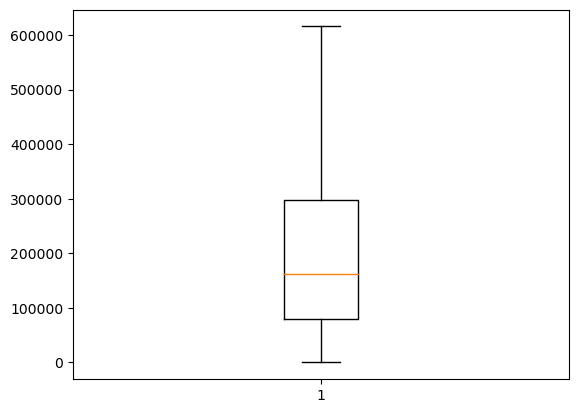

In [72]:
plt.boxplot(train_MAE_lin, showfliers=False)

In [73]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    "n_jobs": [5,10,15,50]
}

grid_search = GridSearchCV(lin, param_grid, cv=5, scoring = "neg_mean_absolute_error",return_train_score=True)
grid_search.fit(X_train_1, y_train_1)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'n_jobs': [5, 10, 15, 50]}, return_train_score=True,
             scoring='neg_mean_absolute_error')

In [74]:
best_lin = grid_search.best_estimator_

In [75]:
best_lin

LinearRegression(n_jobs=5)

In [76]:
best_lin.fit(X_train_1, y_train_1)

LinearRegression(n_jobs=5)

In [77]:
y_train_pred_lin1 = best_lin.predict(X_train_1)

In [78]:
mae(y_train_1, y_train_pred_lin1)

260557.55945119765

In [79]:
best_lin.fit(X_valid, y_valid)

LinearRegression(n_jobs=5)

In [80]:
y_val_pred_lin = best_lin.predict(X_valid)

In [81]:
mae(y_valid, y_val_pred_lin)

238338.11021949942

## Evaluate the model

In [82]:
best_rfr.fit(X_test_normalized, y_test)

RandomForestRegressor(ccp_alpha=0, max_depth=10, max_features=2,
                      n_estimators=50)

In [83]:
y_test_pred = best_rfr.predict(X_test_normalized)

In [84]:
y_test_pred

array([1174072.56487796, 1321799.24756823,  729086.3017995 ,
        723596.25995671, 1160593.63095238,  668075.53366853,
        425142.70415986, 1743769.84968944,  973086.9849947 ,
        469834.41868336,  956857.55935559,  564725.72103796,
       1048560.18725935,  726995.44974145,  383801.5278978 ,
       2031785.31428571, 1075236.86811795,  728019.62500842,
        864617.10191086, 1012455.57133919,  647828.15435927,
       1292198.67423492,  759344.48564648,  505354.6082667 ,
        666879.34961224,  777746.65684174,  609272.17134493,
        614521.07907476, 1035156.05230326,  571524.77674929,
        564798.43821734,  606941.09369603, 1567450.26817599,
        511019.37120927,  764974.26059264, 1010902.5609209 ,
        525999.44436501, 1174333.22859418, 1480506.7081124 ,
       1175464.4924783 , 1473054.81736604,  741224.77732123,
       1630858.84968944, 1496355.58358374, 2450745.23428571,
       1690478.92453272,  963410.31617834,  874533.06301004,
       1176315.60042951,

In [85]:
X_test_normalized

array([[ 0.11345495,  0.83854209,  1.21127748,  0.1329814 ],
       [ 0.91040676,  2.83500013,  1.41782069,  0.45720766],
       [ 0.11345495, -1.15791596, -0.484551  ,  0.88007632],
       ...,
       [ 0.11345495,  0.33942758,  1.31998443, -1.56477159],
       [ 1.70735857,  2.83500013,  1.3852086 ,  0.41071637],
       [ 0.11345495, -0.15968693, -0.47259324, -0.35214517]])

In [86]:
X_test_dataframe = pd.DataFrame(X_test_normalized, columns=['beds','baths','size','lot_size'])

In [87]:
y_test_pred_dataframe = pd.DataFrame(y_test_pred, columns=['price'])

In [88]:
final = pd.DataFrame({'actual:': y_test, 'prediction': y_test_pred})
final

,actual:,prediction
0,1175000.0,1.174073e+06
1,1057500.0,1.321799e+06
2,799000.0,7.290863e+05
3,565000.0,7.235963e+05
4,1187000.0,1.160594e+06
...,...,...
500,3800000.0,3.441380e+06
501,575000.0,6.832860e+05
502,3105000.0,2.781769e+06
503,1807000.0,1.652546e+06


In [89]:
final.isnull().sum()

actual:       0
prediction    0
dtype: int64

In [90]:
final.to_excel('output.xlsx', index=False)

In [91]:
mae(y_test_pred,y_test)

128454.47598278112

In [96]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_test_pred)
print("The accuracy of RFR model is {}%".format(round(score, 2) *100))

The accuracy of RFR model is 90.0%
